In [21]:
import cv2 as cv
import numpy as np
#import os
from google.colab.patches import cv2_imshow as imshow
from keras.models import load_model

Enter the image Path: /content/drive/MyDrive/MP SEM3/Harsh.jpg
Harsh


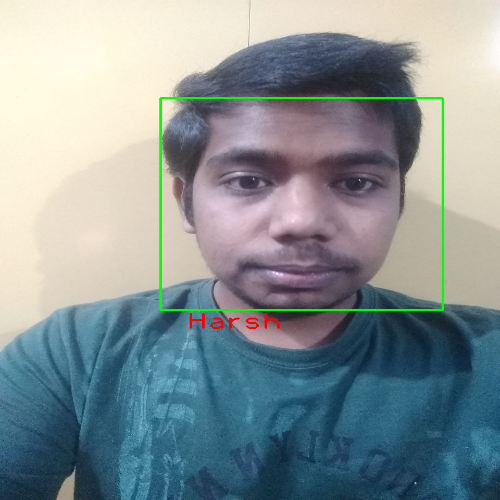

In [25]:
face = cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')

ind = load_model('/content/drive/MyDrive/MP SEM3/FINAL_SEM3.h5')

names = ['None','Harsh','Manas','Muskaan','Vikash']

image_path = input('Enter the image Path: ')

image = cv.imread(image_path,1)
gimg = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

rect = face.detectMultiScale(gimg,1.21,3)

for (x,y,w,h) in rect:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    
cropped = image[y-1:y+h+1, x-1:x+w]

img = np.array(cv.resize(cropped,(150,150)),'uint8')
lis = []
lis.append(img)
lis = np.array(lis,'uint8')

ans = ans = np.argmax(ind.predict(lis),-1)

print(names[ans[0]])

font = cv.FONT_HERSHEY_PLAIN
text1 = names[ans[0]]
cv.putText(image, text1, org=(x+50,y+h+50), fontFace=font, fontScale=4, color= (0,0,255),thickness=3)

image = cv.resize(image,(500,500))

imshow(image)